# Exploring Fancy Indexing

In [56]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [57]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [58]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [59]:
ind2 = [0, 7, 1, 9]
x[ind2]

array([51, 86, 92, 74])

In [60]:
ind = np.array([[3, 7],
               [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [61]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [62]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [63]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [64]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

# Combined Indexing 

In [65]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [66]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [67]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [68]:
mask = np.array([1, 0, 1, 0], dtype = bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# Example: Selecting Random Points

In [69]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

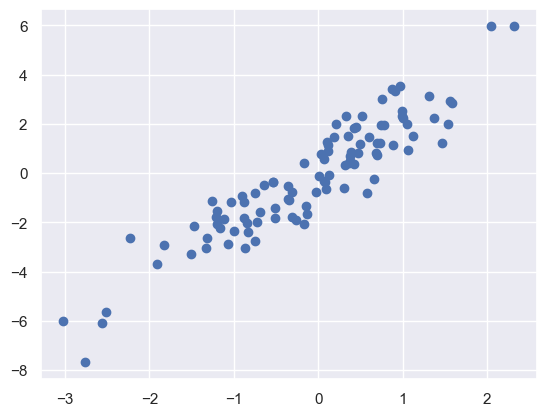

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [71]:
indices = np.random.choice(X.shape[0], 20, replace = False)
indices

array([72,  9, 61, 25, 98, 47, 80, 95, 32, 39, 21, 42,  2, 82, 84, 37, 44,
       93, 55, 10])

In [72]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

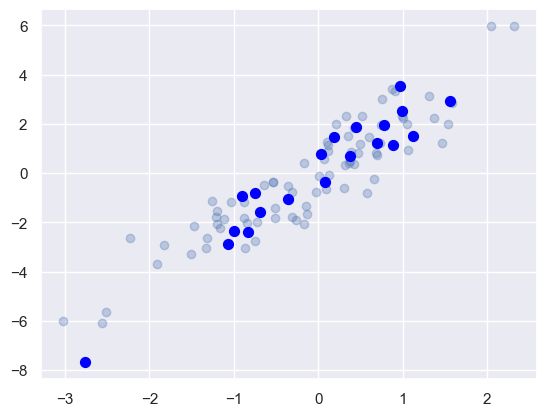

In [73]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor = "blue", s = 50);

# Modyfyting Values with Fancy Indexing

In [74]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [75]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [76]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [77]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [78]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


# Example: Binning Data

In [79]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i , 1)

In [80]:
# plot the results
#plt.plot(bins, counts, linestyle = "steps");

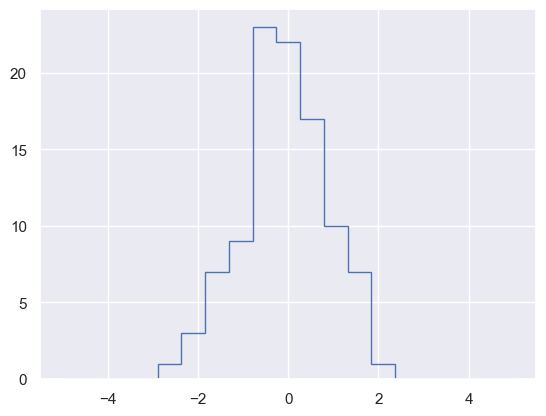

In [81]:
plt.hist(x, bins, histtype = "step");

In [82]:
print("NumPy routine:  ")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine: ")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:  
33.9 µs ± 3.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom routine: 
17.3 µs ± 802 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [83]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)


NumPy routine:
68.6 ms ± 567 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
122 ms ± 5.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
